In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [14]:
# read the dataset
df = pd.read_csv(r'D:\1\ALY6150\2\4total.csv')

# inspect the dataset
print(df.head())
print(df.shape)
print(df.info())

     State  Year  Gender                       Race Age Group Code  \
0  Alabama  2011  Female  Black or African American          45-54   
1  Alabama  2011  Female                      White          55-64   
2  Alabama  2011  Female                      White          65-74   
3  Alabama  2011  Female                      White          75-84   
4  Alabama  2011  Female                      White            85+   

   blood Deaths  blood Population  blood Crude Rate  breath Deaths  \
0            11             95754              11.5             30   
1            11            234795               4.7            215   
2            10            163256               6.1            446   
3            29            102156              28.4            688   
4            21             42924              48.9            693   

   breath Population  breath Crude Rate  cancer Deaths  cancer Population  \
0              95754               31.3            143              95754   
1   

In [15]:
# summary statistics table1
df.describe()

,Year,blood Deaths,blood Population,blood Crude Rate,breath Deaths,breath Population,breath Crude Rate,cancer Deaths,cancer Population,cancer Crude Rate,total Deaths,total Population,total Crude Rate
count,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1.828000e+03,1828.000000,1828.000000,1.828000e+03,1828.000000
mean,2013.534464,23.967724,2.702961e+05,22.247210,656.853939,2.702961e+05,582.683917,1406.728665,2.702961e+05,941.961871,6091.019147,2.702961e+05,5266.110777
std,1.725057,18.946459,3.405809e+05,22.970188,669.190244,3.405809e+05,620.497382,1258.840619,3.405809e+05,692.333239,5981.522322,3.405809e+05,5431.959726
min,2011.000000,10.000000,4.347000e+03,0.500000,10.000000,4.347000e+03,3.600000,14.000000,4.347000e+03,6.600000,208.000000,4.347000e+03,71.300000
25%,2012.000000,12.000000,7.259150e+04,6.100000,180.000000,7.259150e+04,80.150000,546.500000,7.259150e+04,349.450000,2308.750000,7.259150e+04,1114.925000
50%,2014.000000,17.000000,1.492840e+05,13.000000,485.500000,1.492840e+05,290.200000,1023.000000,1.492840e+05,822.150000,4230.000000,1.492840e+05,2565.550000
75%,2015.000000,27.000000,2.946612e+05,30.825000,832.000000,2.946612e+05,878.400000,1745.000000,2.946612e+05,1409.500000,7130.750000,2.946612e+05,6626.350000
max,2016.000000,127.000000,1.998868e+06,230.000000,4793.000000,1.998868e+06,2553.500000,6904.000000,1.998868e+06,2789.000000,45176.000000,1.998868e+06,17338.700000


In [16]:
# summary statistics table2
df.groupby(['Gender']).describe().transpose()

Gender                        Female          Male
Year             count    994.000000    834.000000
                 mean    2013.528169   2013.541966
                 std        1.731676      1.718144
                 min     2011.000000   2011.000000
                 25%     2012.000000   2012.000000
...                              ...           ...
total Crude Rate min       71.300000    130.200000
                 25%      958.800000   1209.400000
                 50%     2164.950000   2644.550000
                 75%    11371.900000   6478.300000
                 max    15664.900000  17338.700000

[104 rows x 2 columns]

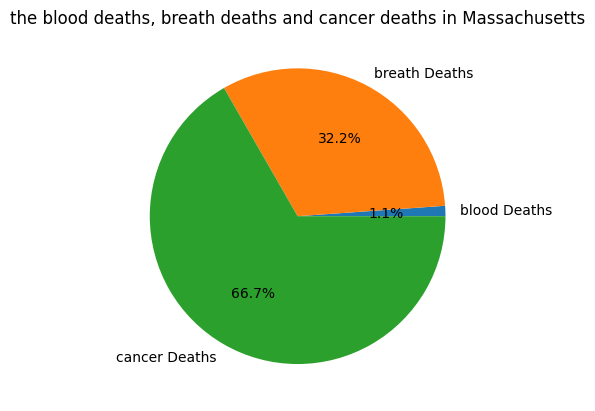

In [17]:
# the blood deaths, breath deaths and cancer deaths in Massachusetts
blood = df.loc[(df['State'] == 'Massachusetts'), ['blood Deaths']]
blood_t = blood['blood Deaths'].sum()
breath = df.loc[(df['State'] == 'Massachusetts'), ['breath Deaths']]
breath_t = breath['breath Deaths'].sum()
cancer= df.loc[(df['State'] == 'Massachusetts'), ['cancer Deaths']]
cancer_t = cancer['cancer Deaths'].sum()

# plot pie chart
fig, ax = plt.subplots()
values = [blood_t, breath_t, cancer_t]
labels = ['blood Deaths', 'breath Deaths','cancer Deaths']
ax.pie(values, labels=labels, autopct='%1.1f%%')

ax.set_title('the blood deaths, breath deaths and cancer deaths in Massachusetts')
plt.show()

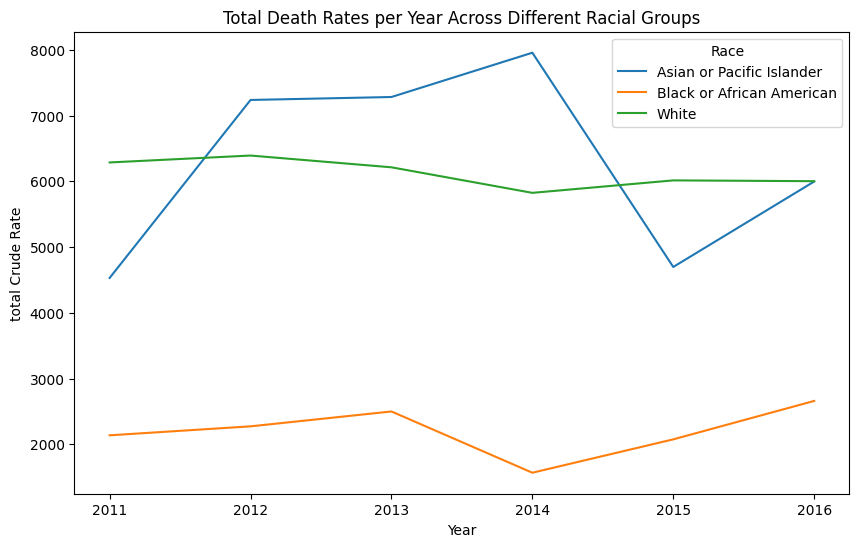

In [18]:
# Group the data by Year and Age Group, calculating the mean of the total death rate
grouped_df = df.groupby(['Year', 'Race'])['total Crude Rate'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10,6))
sns.lineplot(data=grouped_df, x='Year', y='total Crude Rate', hue='Race')
plt.title('Total Death Rates per Year Across Different Racial Groups')
plt.show()

In [19]:
# feature engineering
# generating addtional variables(sum deaths of the 3 kinds of disease, sum crude rate of the 3 kinds of disease) # crude rate means deaths in 100000
df['total death of the 3 kinds of disease'] = df.apply(lambda row: row['blood Deaths'] + row['breath Deaths'] + row['cancer Deaths'], axis=1)
df['total crude rate of the 3 kinds of disease'] = df.apply(lambda row: row['blood Crude Rate'] + row['breath Crude Rate'] + row['cancer Crude Rate'], axis=1)

# Converting continuous variables to binary results
threshold = 6091  #  set the threshold of total deaths to it's mean
df['binary'] = df['total Deaths'].map(lambda x: 0 if x >= threshold else 1)

# convert some variables into dummy
# convert gender into dummy variables
gender = LabelEncoder().fit_transform(df['Gender'])
df.drop('Gender', axis = 1)
df['Gender'] = gender

# convert year into dummy variables
dummy_year = pd.get_dummies(df['Year'], dtype = int)
df_with_dummies = pd.concat([df, dummy_year], axis=1)


# convert race into dummy variables
dummy_race = pd.get_dummies(df['Race'], dtype = int)
df_with_dummies = pd.concat([df_with_dummies, dummy_race], axis=1)

print(df_with_dummies)
print(df_with_dummies['total death of the 3 kinds of disease'])
print(df_with_dummies['total crude rate of the 3 kinds of disease'])


          State  Year  Gender                       Race Age Group Code  \
0       Alabama  2011       0  Black or African American          45-54   
1       Alabama  2011       0                      White          55-64   
2       Alabama  2011       0                      White          65-74   
3       Alabama  2011       0                      White          75-84   
4       Alabama  2011       0                      White            85+   
...         ...   ...     ...                        ...            ...   
1823  Wisconsin  2016       0                      White          75-84   
1824  Wisconsin  2016       0                      White            85+   
1825  Wisconsin  2016       1                      White          65-74   
1826  Wisconsin  2016       1                      White          75-84   
1827  Wisconsin  2016       1                      White            85+   

      blood Deaths  blood Population  blood Crude Rate  breath Deaths  \
0               11        